# Testando o modelo do Detector de Emoções

## Etapa 1 - Importando as bibliotecas

In [2]:
import cv2
import numpy as np
import pandas as pd
#from google.colab.patches import cv2_imshow
import zipfile
import matplotlib.pyplot as plt

In [3]:
#%tensorflow_version 2.x

In [4]:
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
tensorflow.__version__

'2.3.1'

## Etapa 2 - Conectando com o Drive e acessando os arquivos

In [5]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [6]:
# path = "/content/gdrive/My Drive/Material.zip"
# zip_object = zipfile.ZipFile(file = path, mode = "r")
# zip_object.extractall('./')
# zip_object.close

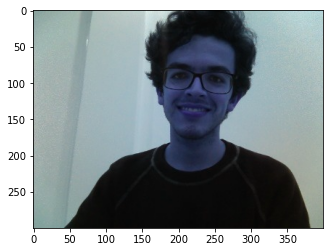

In [7]:
imagem = cv2.imread('Material/testes/teste_gabriel.png')
plt.imshow(imagem)

In [8]:
imagem.shape

(300, 400, 3)

## Testando o Detector

### Carregamento dos modelos

In [9]:
cascade_faces = "Material/haarcascade_frontalface_default.xml"
caminho_modelo = "Material/modelo_01_expressoes.h5"
face_detection = cv2.CascadeClassifier(cascade_faces)
classificador_emocoes = load_model(caminho_modelo, compile = False)
expressoes = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"]

### Detecção de faces

In [10]:
original = imagem.copy()
faces = face_detection.detectMultiScale(original, scaleFactor = 1.1,
                                        minNeighbors = 3, minSize = (20,20))

In [11]:
faces

array([[162,  40, 128, 128]], dtype=int32)

In [12]:
len(faces)

1

In [13]:
faces.shape

(1, 4)

### Extração do ROI (region of interest)

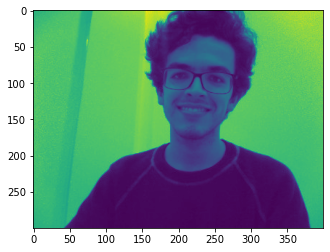

In [14]:
cinza = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
plt.imshow(cinza)

In [15]:
cinza.shape

(300, 400)

In [16]:
roi = cinza[40:40 + 128, 162:162 +128]

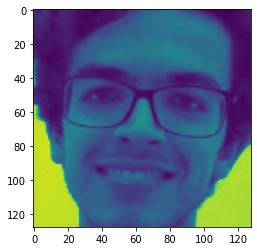

In [17]:
plt.imshow(roi)

In [18]:
roi.shape

(128, 128)

In [19]:
roi

array([[ 39,  37,  28, ...,  25,  29,  34],
       [ 34,  32,  25, ...,  24,  24,  29],
       [ 31,  33,  30, ...,  23,  22,  26],
       ...,
       [184, 185, 186, ..., 180, 181, 181],
       [184, 185, 186, ..., 179, 181, 180],
       [184, 185, 187, ..., 180, 181, 180]], dtype=uint8)

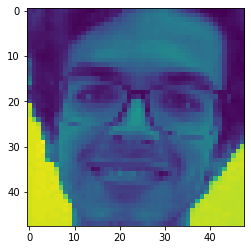

In [20]:
roi = cv2.resize(roi, (48, 48))
plt.imshow(roi)

In [21]:
roi.dtype

dtype('uint8')

In [22]:
roi = roi.astype('float')
roi.dtype

dtype('float64')

In [23]:
roi

array([[ 33.,  29.,  38., ...,  16.,  22.,  25.],
       [ 32.,  37.,  37., ...,  16.,  20.,  25.],
       [ 32.,  36.,  31., ...,  17.,  21.,  25.],
       ...,
       [186., 189., 189., ..., 181., 181., 180.],
       [185., 188., 189., ..., 180., 181., 180.],
       [185., 188., 188., ..., 179., 180., 181.]])

In [24]:
roi = roi / 255

In [25]:
roi

array([[0.12941176, 0.11372549, 0.14901961, ..., 0.0627451 , 0.08627451,
        0.09803922],
       [0.1254902 , 0.14509804, 0.14509804, ..., 0.0627451 , 0.07843137,
        0.09803922],
       [0.1254902 , 0.14117647, 0.12156863, ..., 0.06666667, 0.08235294,
        0.09803922],
       ...,
       [0.72941176, 0.74117647, 0.74117647, ..., 0.70980392, 0.70980392,
        0.70588235],
       [0.7254902 , 0.7372549 , 0.74117647, ..., 0.70588235, 0.70980392,
        0.70588235],
       [0.7254902 , 0.7372549 , 0.7372549 , ..., 0.70196078, 0.70588235,
        0.70980392]])

In [26]:
roi = img_to_array(roi)

In [27]:
roi

array([[[0.12941177],
        [0.11372549],
        [0.14901961],
        ...,
        [0.0627451 ],
        [0.08627451],
        [0.09803922]],

       [[0.1254902 ],
        [0.14509805],
        [0.14509805],
        ...,
        [0.0627451 ],
        [0.07843138],
        [0.09803922]],

       [[0.1254902 ],
        [0.14117648],
        [0.12156863],
        ...,
        [0.06666667],
        [0.08235294],
        [0.09803922]],

       ...,

       [[0.7294118 ],
        [0.7411765 ],
        [0.7411765 ],
        ...,
        [0.70980394],
        [0.70980394],
        [0.7058824 ]],

       [[0.7254902 ],
        [0.7372549 ],
        [0.7411765 ],
        ...,
        [0.7058824 ],
        [0.70980394],
        [0.7058824 ]],

       [[0.7254902 ],
        [0.7372549 ],
        [0.7372549 ],
        ...,
        [0.7019608 ],
        [0.7058824 ],
        [0.70980394]]], dtype=float32)

In [28]:
roi.shape

(48, 48, 1)

In [29]:
roi = np.expand_dims(roi, axis = 0)

In [30]:
roi.shape

(1, 48, 48, 1)

### Previsões

In [31]:
preds = classificador_emocoes.predict(roi)[0]

In [32]:
for i in preds:
    print(i*100)

0.0016802110621938482
5.767966548830827e-07
0.0011206568160559982
99.06646013259888
0.001803373743314296
0.0018518279830459505
0.9270812384784222


In [33]:
len(preds)

7

In [34]:
emotion_probability = np.max(preds)
emotion_probability

0.9906646

In [35]:
preds.argmax()

3

In [36]:
label = expressoes[preds.argmax()]
label

'Feliz'

### Resultados

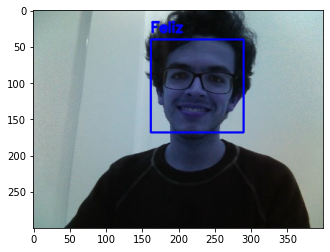

In [37]:
cv2.putText(original, label, (162, 40 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65,
            (0, 0, 255), 2, cv2.LINE_AA)
cv2.rectangle(original, (162, 40), (162 + 128, 40 + 128), (0, 0, 255), 2)
plt.imshow(original)

In [38]:
probabilidades = np.ones((250,300,3), dtype= 'uint8') * 255
probabilidades

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [39]:
probabilidades.shape

(250, 300, 3)

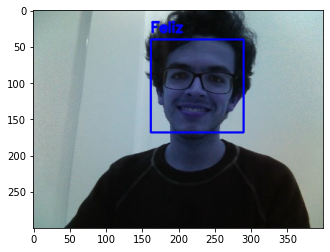

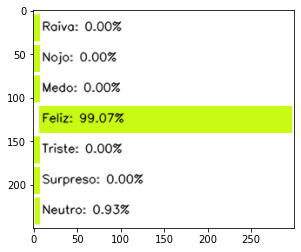

In [40]:
plt.imshow(original)
plt.show()
if len(faces) == 1:
  for (i, (emotion, prob)) in enumerate(zip(expressoes, preds)):
    #print(i, emotion, prob)
    text = "{}: {:.2f}%".format(emotion, prob * 100)
    w = int(prob * 300)
    cv2.rectangle(probabilidades, (7, (i * 35) + 5), (w, (i * 35) + 35), (200, 250, 20), -1)
    cv2.putText(probabilidades, text, (10, (i * 35) + 23), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 0), 1, cv2.LINE_AA)
plt.imshow(probabilidades)